### Contents

- 결함 탐색
- 조건 탐색
- 변수 탐색
- 인코딩
- 시각적 탐색


In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
con1 = pd.concat([df1, df2], axis = 0)
# con1 = pd.concat([df1, df2], axis = 0, ignore_index = True)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con1 = pd.concat([df1, df2], axis = 1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합하는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge() 를 이용한 결합
# pd.merge(df1, df2, on = 'ind', how = 'outer')
pd.merge(df1, df2, on = 'ind') # drfault : 교집합

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
df1 = df1.drop('ind', axis = 1)
df2 = df2.drop('ind', axis = 1)
print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합(기본값은 교집합)
df1.join(df2, lsuffix = '_1', rsuffix = '_2')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how = 'inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how = 'outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

filepath1 = '/content/drive/MyDrive/AI기반 챗봇 및 OCR개발 전문가 과정/m3_분석라이브러리/Pandas./DataSet/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/AI기반 챗봇 및 OCR개발 전문가 과정/m3_분석라이브러리/Pandas./DataSet/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine = 'openpyxl', index_col = 'id')
df2 = pd.read_excel(filepath2, engine = 'openpyxl', index_col = 'id')

print(df1, '\n')
print(df2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990     

In [ ]:
# 데이터프레임 결합 (join)
# 어떤 것을 기준으로 결합을 할 것인가에 대해 기준을 정한다.
# df1의 행 인덱스를 기준으로 결합하는 'how', / 'left' 옵션이 기본적으로 적용이 된다.
df3 = df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
df4 = df1.join(df2, how = 'right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
df5 = df1.join(df2, how = 'inner')
print(df5)

#### Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [ ]:
# 두 데이터프레임 결합 (내부 조인)
merged_df = pd.merge(customers, purchases, on = 'customer_id', how = 'inner')

# 고객별 총 지출 계산
# reset_index() 를 쓰지 않게 되면 출력 형태가 Series의 형태로 되고,
# 쓰게 되면 DateFrame의 형태가 되기 때문에 뒤에 붙여준다.
total_spent = merged_df.groupby('name')['amount'].sum().reset_index()

# 결과 출력
print(total_spent)

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


#### Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요

In [ ]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [ ]:
merged_df = pd.merge(grades, subjects, on = 'subject_id', how = 'inner')

average_grades = merged_df.groupby('subject_name')['grade'].mean().reset_index()

print(average_grades)

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


#### Q. df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인 데이트를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, < 아 == 를 반드시 사용해야함)



In [ ]:
df4.loc[:, 'eps'] < 3000

id
130960    False
139480    False
145990    False
185750    False
204210     True
Name: eps, dtype: bool

In [ ]:
df4.loc[:, 'stock_name'] == '이마트'

id
130960    False
139480     True
145990    False
185750    False
204210    False
Name: stock_name, dtype: bool

In [ ]:
df4 = df1.join(df2, how = 'inner')

df5 = (df4.loc[:, 'eps'] < 3000, df4.loc[:, 'stock_name'] == '이마트')
df5

(id
 130960    False
 139480    False
 145990    False
 185750    False
 204210     True
 Name: eps, dtype: bool,
 id
 130960    False
 139480     True
 145990    False
 185750    False
 204210    False
 Name: stock_name, dtype: bool)

In [ ]:
print(df4.columns)

Index(['stock_name', 'value', 'price', 'name', 'eps', 'bps', 'per', 'pbr'], dtype='object')


In [ ]:
df4.drop('name', axis = 1, inplace = True)

df5 = df4[(df4['eps'] < 3000) | (df4['stock_name'] == '이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
136480,NaN,NaN,NaN,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,18268.166667,295780,13.931338,0.860437
181710,NaN,NaN,NaN,2110.166667,78434,30.755864,0.827447
204210,모두투어리츠,3093.333333,3475.0,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
np.random.seed(0)
data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data, columns = ['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1, '\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1[df1.a > 10]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15
df[cond1 | cond2 | cond3]
# df[cond1 & cond2 & cond3]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
df[cond1][['a','b']]

,a,b
3,15,16


In [ ]:
# df1.a > 10 → df1 데이터프레임에 'a' Value의 값이 10보다 큰 index
idx = df1[df1.a > 10].index
print(idx, '\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


#### Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
c = customers.copy()
c

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
c1 = c['age'] >= 30
c2 = c['spending'] >= 500

c[c1 | c2]

,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


#### Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [ ]:
s = students.copy()
s1 = s['math_score'] >= 80
s2 = s['math_score'] <= 90

s[s1 & s2]

,student_id,name,math_score,english_score
1,102,Bob,85,78
2,103,Charlie,88,82


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.rename(columns = {'sex':'gender', 'fare':'ticket'},inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값 변경
# df.sex.replace({'famale':1, 'male':0}, inplace = True)
df1 = tdf[['gender']].replace(['female', 'male'],[1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
tdf1 = tdf.copy()
tdf1.gender.replace({'female':1, 'male':0}, inplace = True)
tdf1.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Column 대문자 변경
tdf.rename(str.upper, axis = 'columns', inplace = True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Column 소문자 변경
tdf.rename(str.lower, axis = 'columns', inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df2 = df.copy()
columns_customed = ['survived', 'pclass', 'sex', 'age']
df2[columns_customed].head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
tdf1 = tdf[['age', 'ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
# tdf1의 타입을 float → int로 변경

tdf1 = tdf1.astype({'age':'int', 'ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# age 칼럼의 값 구성 체크
tdf.age.value_counts()
# age_counts_sorted.sort_index()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 칼럼의 고유 구성 요소
len(tdf.age.unique())

89

In [ ]:
# age 칼럼 범주화

def get_category(x):
      if x <= 3:
         return 'Baby'
      elif x > 3 and x <= 7:
         return 'Child'
      elif x > 7 and x <= 19:
         return 'Teenager'
      elif x > 20 and x <= 40:
         return 'Young Adult'
      elif x > 40 and x <= 60:
         return 'Adult'
      else:
         return 'Elderly'

In [ ]:
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Young Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult


In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf[['age', 'cat']].head()

,age,cat
0,22.0,Teenager
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


#### Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()


Saving titanic3.csv to titanic3.csv


In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
average_fares = df.groupby('pclass')['fare'].mean().reset_index()
average_fares

,pclass,fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


#### Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요

In [114]:
import numpy as np

# 0.7이상 높으면 상관관계가 높다고 대체로 파악함.
# 하지만 해당 데이터에서 0.24 정도면 높은 수치임.
# sex / fare /pclass를 중점적으로 보기

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male':0, 'female':1})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending = False)
print(survival_correlation)

               pclass  survived       sex       age     sibsp     parch  \
pclass       1.000000 -0.312469 -0.124617 -0.408106  0.060832  0.018322   
survived    -0.312469  1.000000  0.528693 -0.055512 -0.027825  0.082660   
sex         -0.124617  0.528693  1.000000 -0.063645  0.109609  0.213125   
age         -0.408106 -0.055512 -0.063645  1.000000 -0.243699 -0.150917   
sibsp        0.060832 -0.027825  0.109609 -0.243699  1.000000  0.373587   
parch        0.018322  0.082660  0.213125 -0.150917  0.373587  1.000000   
fare        -0.558629  0.244265  0.185523  0.178740  0.160238  0.221539   
body        -0.034642       NaN  0.015903  0.058809 -0.099961  0.051099   
with_family -0.147393  0.201719  0.284537 -0.128755  0.591077  0.549022   
family_size  0.050027  0.026876  0.188583 -0.240229  0.861952  0.792296   

                 fare      body  with_family  family_size  
pclass      -0.558629 -0.034642    -0.147393     0.050027  
survived     0.244265       NaN     0.201719     0.026

#### Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

In [ ]:
# 가족 크기 계산
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size', 'survived']].corr().iloc[0, 1]
survival_family_correlation

0.02687643412533259

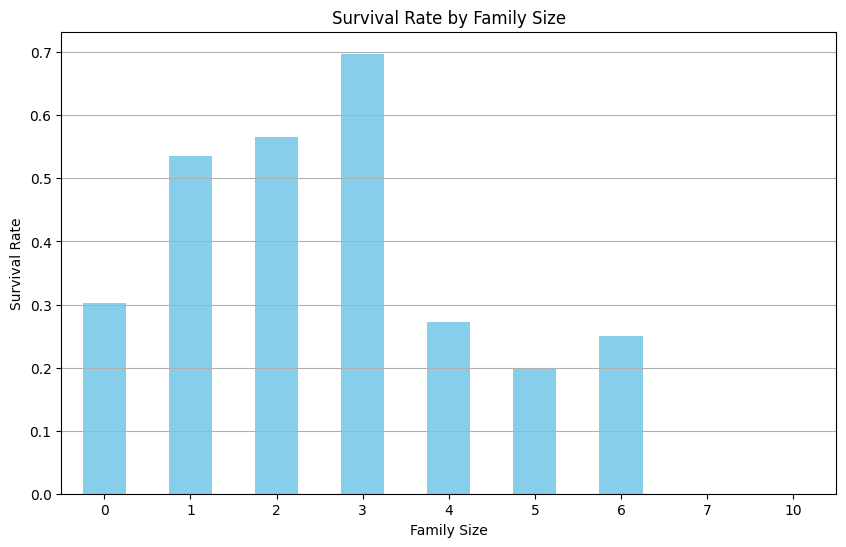

In [ ]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

#### Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

df[['pclass', 'fare']].head()

,pclass,fare
0,1,211.3375
1,1,151.5500
2,1,151.5500
3,1,151.5500
4,1,151.5500


In [ ]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass)

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass', 'fare', 'mean_fare_by_pclass']].head()

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973}


,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [ ]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]
mean_fare_survival_correlation

0.2918753351352463

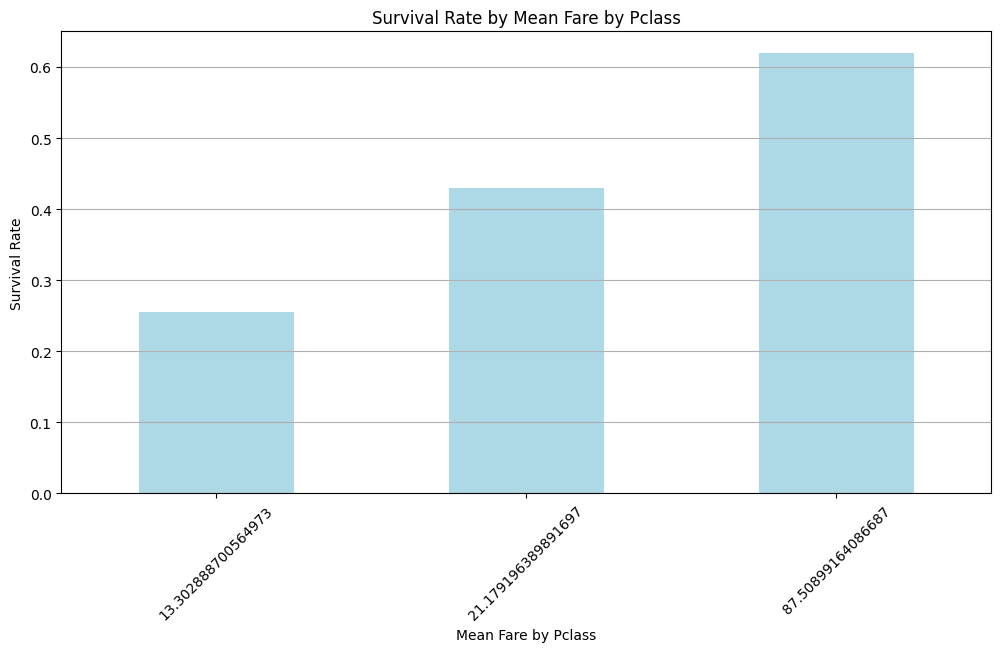

In [ ]:
# 생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')


### 범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = LabelEncoder()
features = ['gender', 'age']
for feature in feature:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf.head()

NameError: name 'LabelEncoder' is not defined

In [ ]:
tdf2 = tdf[['gender', 'class']]
tdf2.head()

,gender,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()

,gender_female,gender_male,class_First,class_Second,class_Third
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,True,False,False
4,False,True,False,False,True


#### Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [ ]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))
ts1 = ts.cumsum()
df = pd.DataFrame({'value':ts, 'cum':ts1})
df.head()

,value,cum
2020-01-01,0.284729,0.284729
2020-01-02,0.896113,1.180843
2020-01-03,-0.164277,1.016565
2020-01-04,-0.622149,0.394416
2020-01-05,-0.670250,-0.275834


In [ ]:
num = np.random.randn(1000000)
mean_val = num.mean()
std_dev = num.std()
print(mean_val, std_dev)

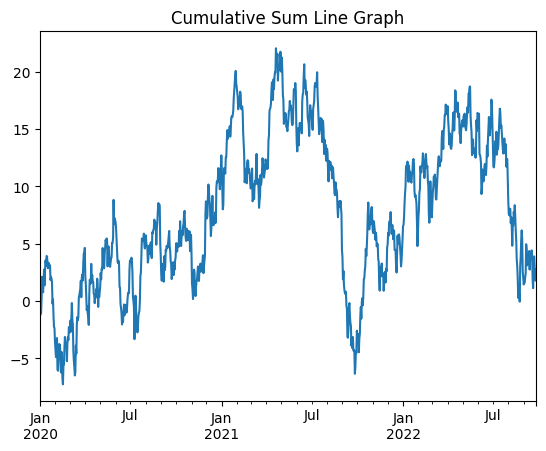

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

              A         B
one    0.326129  0.580751
two    0.292065  0.226410
three  0.802504  0.404820
four   0.860067  0.435344
five   0.523764  0.080132 



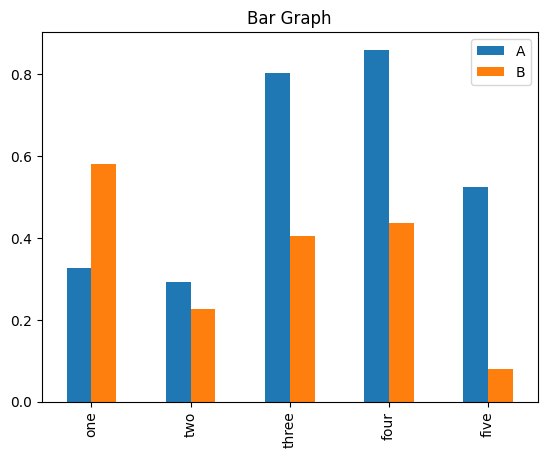

In [ ]:
df = pd.DataFrame({
    'A':np.random.rand(5),
    'B':np.random.rand(5)
}, index = ['one', 'two', 'three', 'four', 'five'])
print(df, '\n')

# 막대 그래포
df.plot.bar()
plt.title('Bar Graph')
plt.show()

               A         B
0       0.087389  0.285225
1       1.464563 -0.046319
2      -1.117418  1.067012
3       1.859769  1.746927
4      -1.167385 -0.526249
...          ...       ...
999995 -1.796246  1.715652
999996 -0.084555 -0.060884
999997 -0.891856  1.033083
999998  1.081840 -0.156707
999999  0.483529 -0.466848

[1000000 rows x 2 columns] 



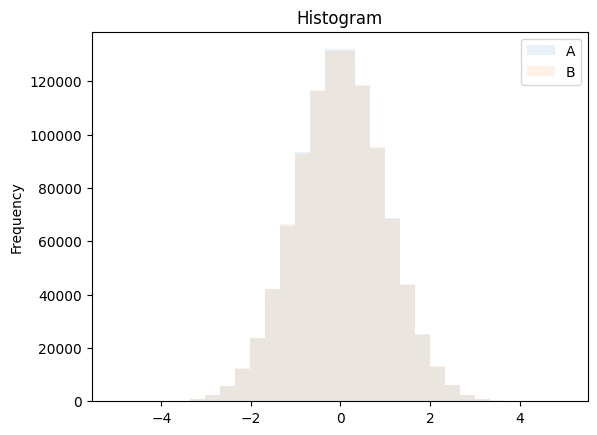

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})
print(df, '\n')

# 히스토그램
# alpha : 투명도 / 낮을 수록 투명해짐
# bins : 구간 간격 갯수
df.plot.hist(alpha = 0.3, bins = 30)
plt.title('Histogram')
plt.show()

            A         B
0   -0.070644  0.777701
1    0.851180 -1.425456
2   -0.584878 -0.098970
3    0.569560  1.191163
4   -0.245475 -1.015923
..        ...       ...
995  0.416935 -1.893441
996  0.027509 -2.271546
997  0.776404 -0.545148
998 -0.757075  0.879217
999 -0.360252 -1.654603

[1000 rows x 2 columns] 



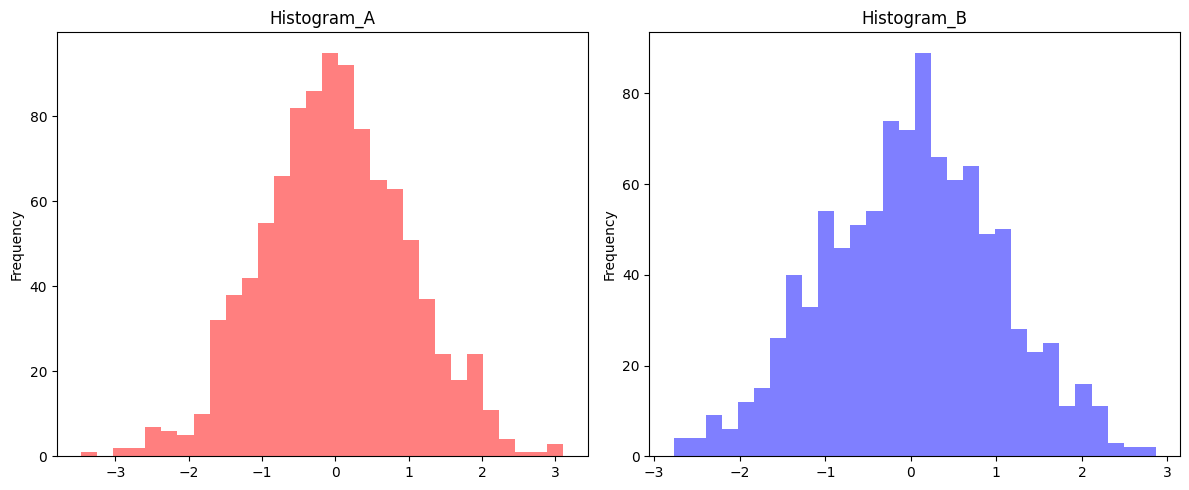

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})
print(df, '\n')

# 그래프의 크기 설정
plt.figure(figsize = (12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha = 0.5, bins = 30, color = 'red')
plt.title('Histogram_A')

# 두 번째 히스토그램 (X)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha = 0.5, bins = 30, color = 'blue')
plt.title('Histogram_B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

          A         B         C         D         E
0  0.590197  0.031988  0.139716  0.779574  0.910540
1  0.596612  0.990963  0.991742  0.671230  0.392134
2  0.618320  0.099094  0.143516  0.971465  0.479515
3  0.270024  0.412211  0.907906  0.800788  0.332353
4  0.256476  0.226916  0.408634  0.066562  0.570487
5  0.261286  0.085953  0.865077  0.183555  0.781547
6  0.643569  0.098329  0.071526  0.641056  0.839533
7  0.832743  0.546232  0.135770  0.771453  0.472507
8  0.175763  0.759138  0.605735  0.192060  0.479059
9  0.327583  0.974795  0.195163  0.931358  0.387198 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.457257   0.422562   0.446478   0.600910   0.564487
std     0.223250   0.375738   0.364909   0.330133   0.205631
min     0.175763   0.031988   0.071526   0.066562   0.332353
25%     0.263470   0.098520   0.140666   0.304309   0.412227
50%     0.458890   0.319563   0.301898   0.721342   0.479287

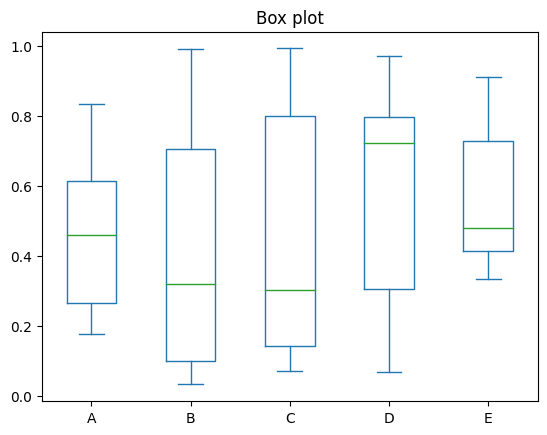

In [ ]:
df = pd.DataFrame(np.random.rand(10, 5), columns = ['A', 'B', 'C', 'D', 'E'])
print(df, '\n')
print(df.describe(), '\n')

# 박스 플롯
df.plot.box()
plt.title('Box plot')
plt.show()

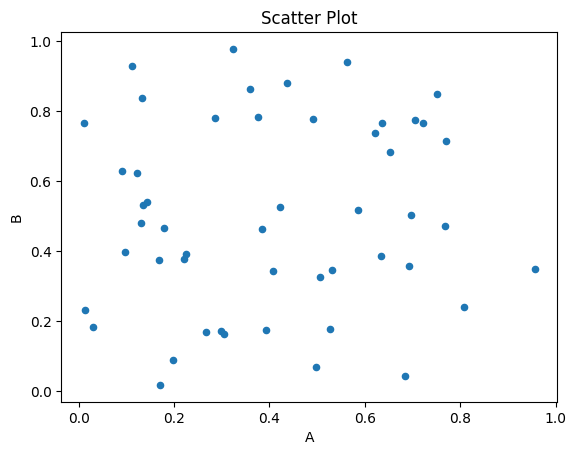

In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns = ['A', 'B', 'C', 'D'])


# 산점도
# a와 b사이에 양/음의 상관관계를 확인할 수 있다.
df.plot.scatter(x='A', y = 'B')
plt.title('Scatter Plot')
plt.show()

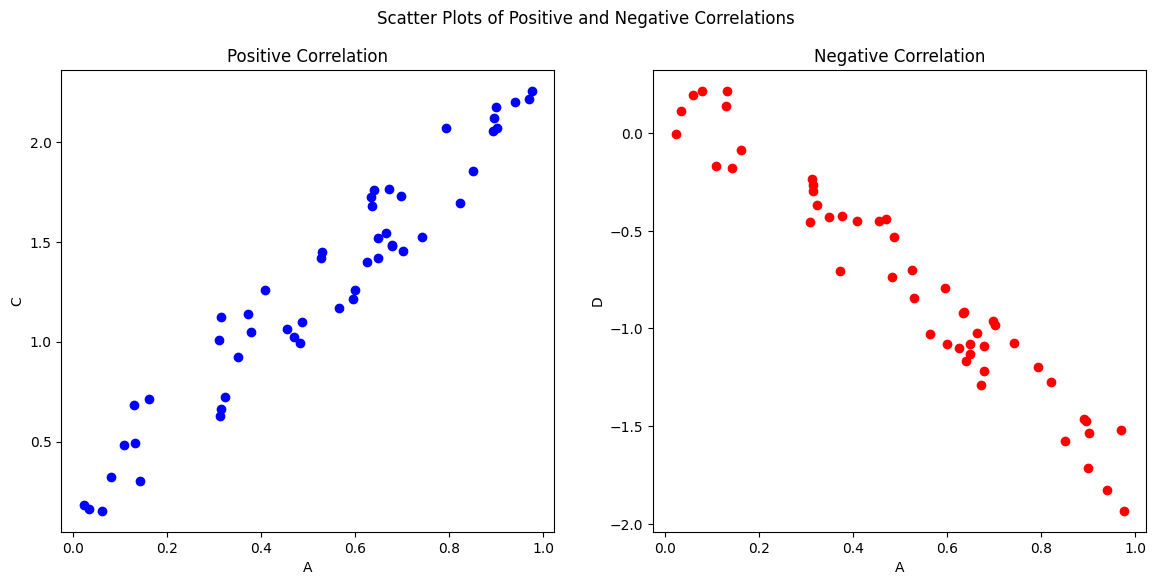

In [ ]:
df = pd.DataFrame(np.random.rand(50, 4), columns = ['A', 'B', 'C', 'D'])

# 양의 상관관계
df['C'] = df['A'] * 2 + np.random.rand(50) * 0.5

# 음의 상관관계
df['D'] = -df['A'] * 2 + np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2, figsize = (14, 6))

axs[0].scatter(df['A'], df['C'], color = 'blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'], df['D'], color = 'red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Plots of Positive and Negative Correlations')
plt.show()

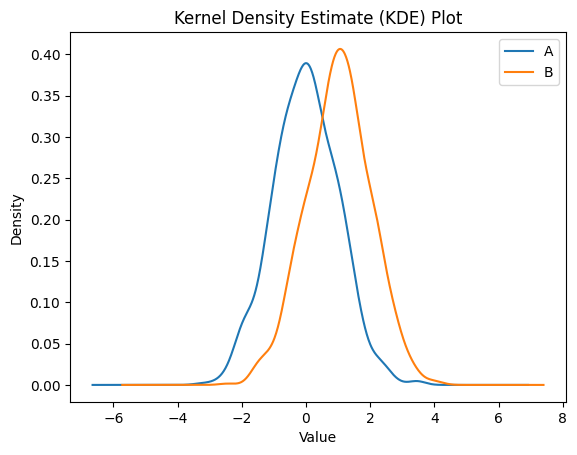

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 커널 밀도 추정(KDE, Kernal Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프

# 데이터생성
data = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000) + 1
})

# KDE 그래프
data['A'].plot.kde(label = 'A')
data['B'].plot.kde(label = 'B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

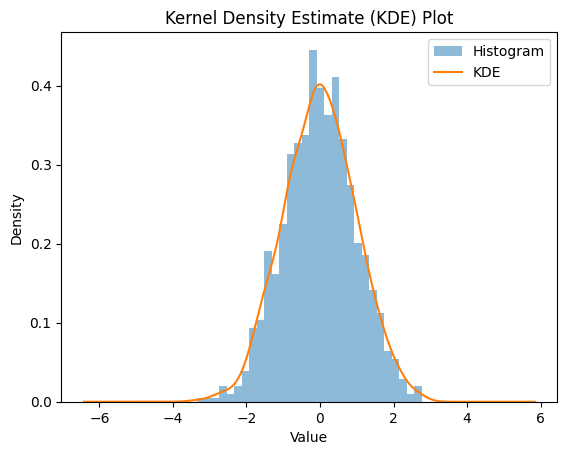

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 커널 밀도 추정(KDE, Kernal Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프

# 데이터생성
data = pd.Series(np.random.randn(1000))

# KDE 그래프
ax = data.plot.hist(bins = 30, alpha = 0.5, density = True, label = 'Histogram')
data.plot.kde(ax = ax, label = 'KDE')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)


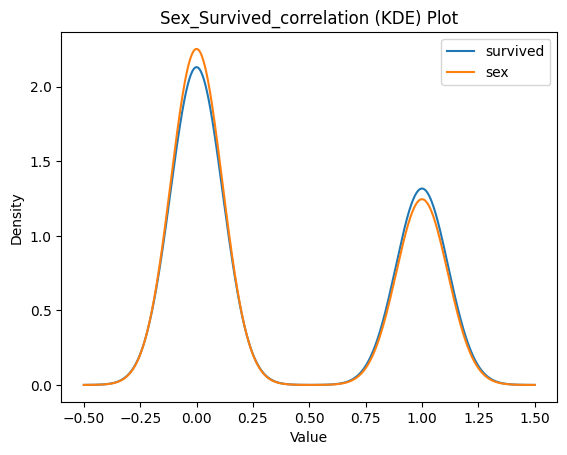

In [ ]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# KDE 그래프
df['survived'].plot.kde(label = 'survived', legend = True)
df['sex'].plot.kde(label = 'sex', legend = True)
plt.title('Sex_Survived_correlation (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

sex
male      0.190985
female    0.727468
Name: survived, dtype: float64 



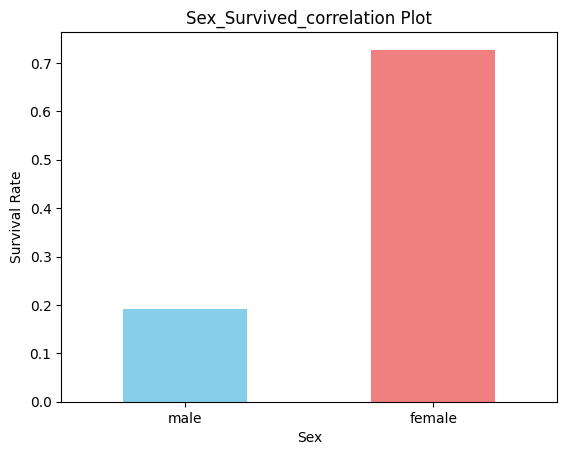

In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

sbs = df.groupby('sex')['survived'].mean().sort_values()
print(sbs, '\n')

sbs.plot(kind = 'bar', color = ['skyblue', 'lightcoral'])
plt.title('Sex_Survived_correlation Plot')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# 필요한 열 선택 및 전처리
features = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']
df = df[features + ['survived']]

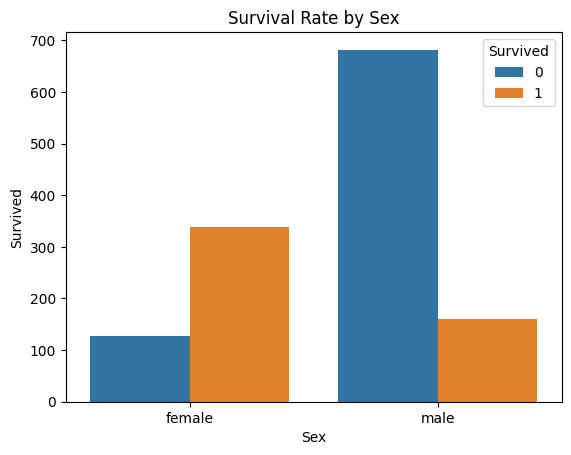

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존, 사망) 수 관계 시각화
sns.countplot(x = 'sex', hue = 'survived', data = df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend(title = 'Survived')
plt.show()

Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

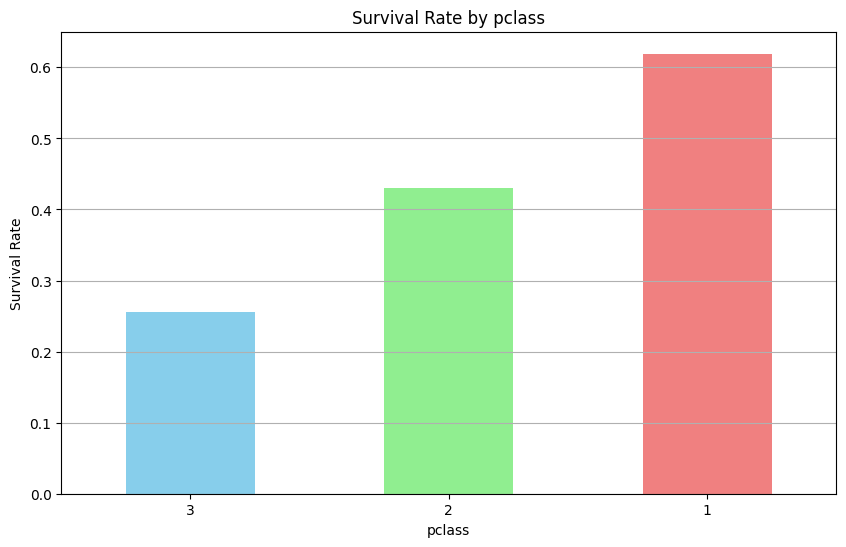

In [ ]:
# 승객 등급
pclass_survival_rate = df.groupby('pclass')['survived'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
pclass_survival_rate.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Survival Rate by pclass')
plt.xlabel('pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

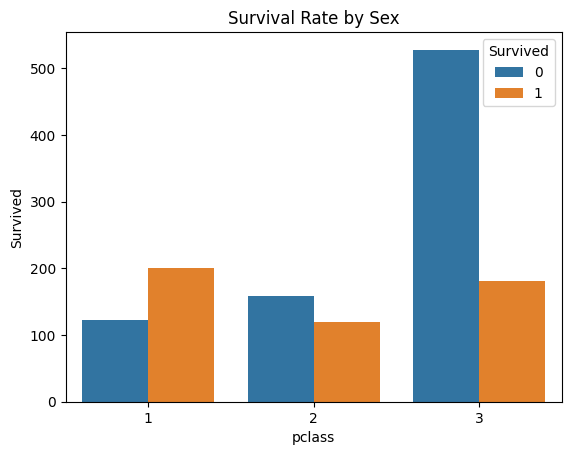

In [ ]:
sns.countplot(x = 'pclass', hue = 'survived', data = df)
plt.title('Survival Rate by Sex')
plt.xlabel('pclass')
plt.ylabel('Survived')
plt.legend(title = 'Survived')
plt.show()

Q. 나이와 생존율 관계를 시각화하여 출력하세요.

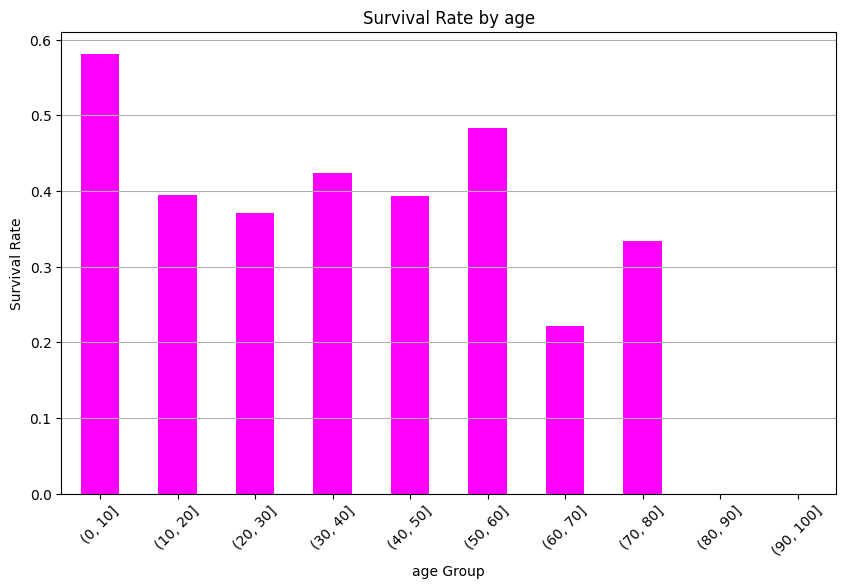

In [ ]:
# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 데이터가 너무 많기 때문에 구간을 나눈다.
df['age_group'] = pd.cut(df['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# 나이
age_survival_rate = df.groupby('age_group')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
age_survival_rate.plot(kind='bar', color='magenta')
plt.title('Survival Rate by age')
plt.xlabel('age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

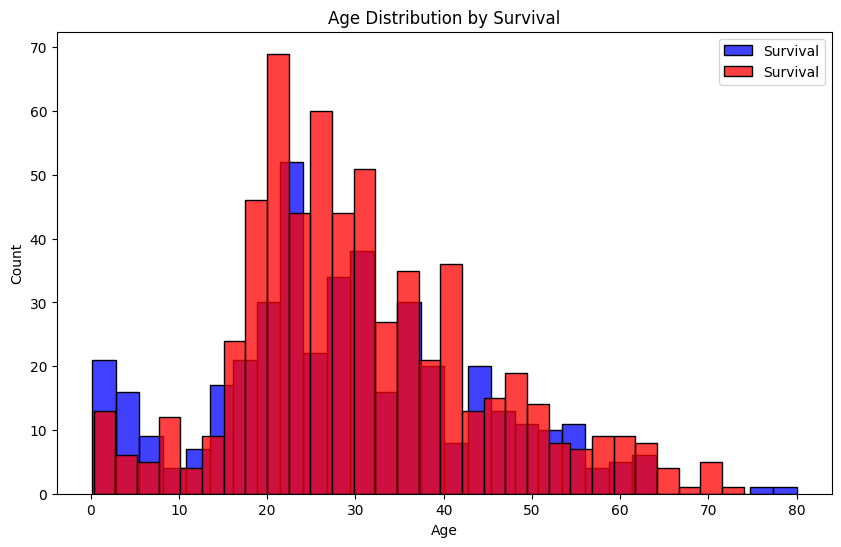

In [ ]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize = (10, 6))
sns.histplot(df[df['survived'] == 1]['age'], bins = 30, kde = False, color = 'blue', label = 'Survival')
sns.histplot(df[df['survived'] == 0]['age'], bins = 30, kde = False, color = 'red', label = 'Survival')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

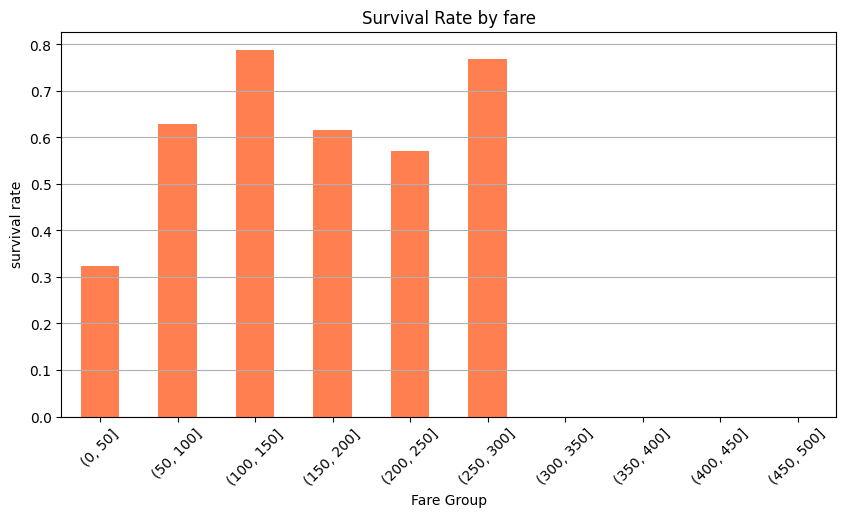

In [ ]:
df['fare_group'] = pd.cut(df['fare'], bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

fare_survival_rate = df.groupby('fare_group')['survived'].mean()

plt.figure(figsize = (10, 5))
fare_survival_rate.plot(kind = 'bar', color = 'coral')
plt.title('Survival Rate by fare')
plt.xlabel('Fare Group')
plt.ylabel('survival rate')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')

plt.show()

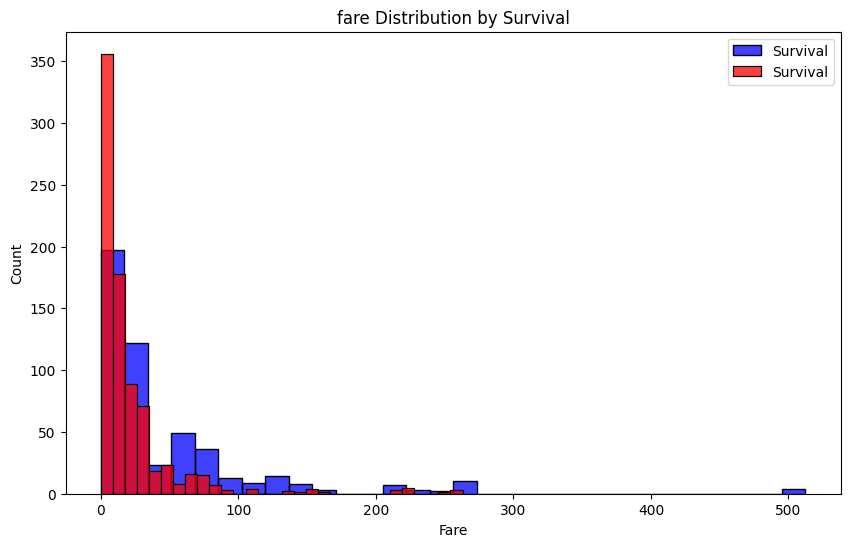

In [ ]:
# 요금과 생존, 사망자 수 관계 시각화
plt.figure(figsize = (10, 6))
sns.histplot(df[df['survived'] == 1]['fare'], bins = 30, kde = False, color = 'blue', label = 'Survival')
sns.histplot(df[df['survived'] == 0]['fare'], bins = 30, kde = False, color = 'red', label = 'Survival')
plt.title('fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

In [ ]:
# 가족 크기 계산
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size', 'survived']].corr().iloc[0, 1]
survival_family_correlation

0.02687643412533259

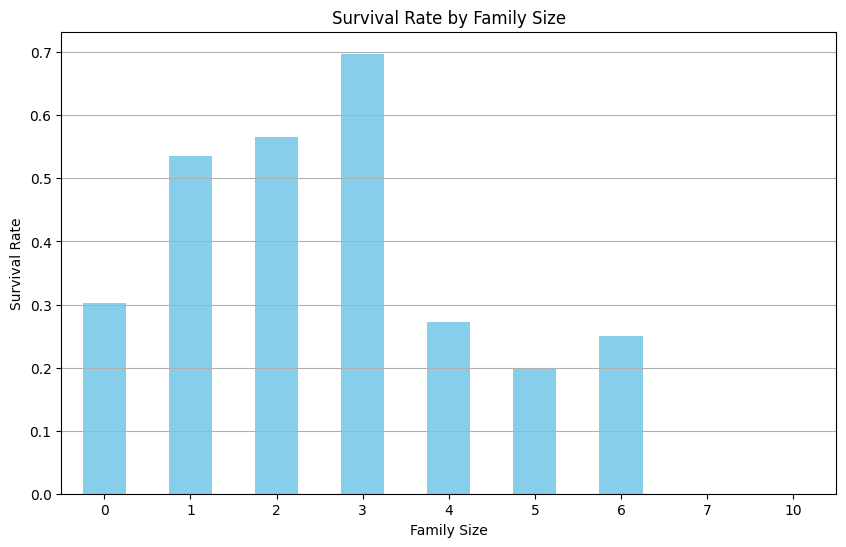

In [ ]:
# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



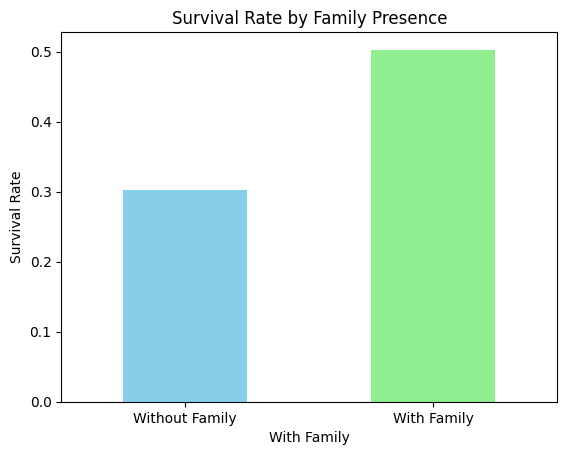

In [ ]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

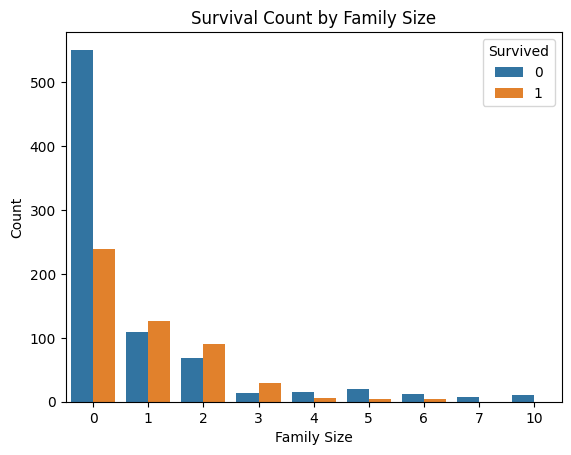

In [ ]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()